In [38]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt  
import csv
import datetime, time

# from Arduino_device import ArduinoVISADevice, list_devices
rm = pyvisa.ResourceManager("@py")
ports = rm.list_resources()
device = rm.open_resource("ASRL/dev/cu.usbmodem1101::INSTR", read_termination="\r\n", write_termination="\n")
print(ports,device.query("*IDN?"))



('ASRL/dev/cu.RichardHP::INSTR', 'ASRL/dev/cu.Bluetooth-Incoming-Port::INSTR', 'ASRL/dev/cu.usbmodem1101::INSTR') Arduino VISA firmware v0.2


In [39]:
port = list_devices()

device = ArduinoVISADevice(port=port[2])
v1list,v2list=[],[]
output = device.set_output_value(channel=0,value=1000)
print(device.get_input_volt(channel=1))
for i in range(1024):
    output = device.set_output_value(channel=0,value=i)
    v1list.append(device.get_input_volt(channel=1))
    v2list.append(device.get_input_volt(channel=2))
plt.scatter(np.asarray(v1list)-np.asarray(v2list), np.asarray(v2list)/220., s=60)
plt.show()


NameError: name 'list_devices' is not defined

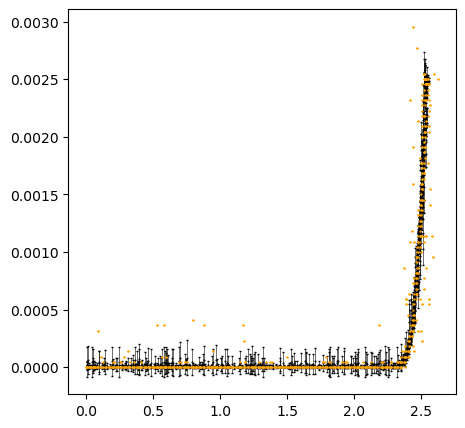

In [ ]:
import pandas as pd
import glob
files = glob.glob('./data/*.csv')
Vledlist =[]
Iledlist = []
for i in range(9):
    df = pd.read_csv(files[i],header=1)
    Vled= df['V1']-df['V2']
    Iled = df['V2']/220.
    Vledlist.append(Vled)
    Iledlist.append(Iled)
    
fig,axes=plt.subplots(1,1,figsize=(5,5))
axes.errorbar(np.mean(Vledlist,axis=0),np.mean(Iledlist,axis=0),yerr = np.std(Iledlist,axis=0),fmt='.',ms=1,color='black',
              capsize=.5,elinewidth=.4)

axes.errorbar(Vledlist[0],Iledlist[0],yerr=0,fmt='.',ms=1,color='orange',
              capsize=.5,elinewidth=.4)
plt.show()

In [ ]:
print(len(np.std(Iledlist,axis=0)))

1024


In [ ]:
def adc_to_volt(adc):
    return adc*3.3/1023


In [ ]:

s = np.arange(0,6.,1)
print(s)
print(s.dtype)

[0. 1. 2. 3. 4. 5.]
float64


In [43]:
N=10
for n in np.arange(0,10,0.1):
    print(n)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1000000000000005
4.2
4.3
4.4
4.5
4.6000000000000005
4.7
4.800000000000001
4.9
5.0
5.1000000000000005
5.2
5.300000000000001
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.9
6.0
6.1000000000000005
6.2
6.300000000000001
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.0
7.1000000000000005
7.2
7.300000000000001
7.4
7.5
7.6000000000000005
7.7
7.800000000000001
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.700000000000001
8.8
8.9
9.0
9.1
9.200000000000001
9.3
9.4
9.5
9.600000000000001
9.700000000000001
9.8
9.9


In [6]:
A = [1, 2, 3, 4]
B = [1, 4, 9]
for a, b in zip(A, B):
    print(a,b)
# print(f"{a=} {b=}")
# a=1 b=1
# a=2 b=4
# a=3 b=9
# a=4 b=16

1 1
2 4
3 9
